In [2]:
import pandas as pd
import numpy as np
from collections import Counter

In [11]:
dataset = []
with open("/content/drive/MyDrive/CSE477 Project/kosarak.dat") as f:
  for line in f:
    dataline = [int(i) for i in line.split(' ')[:-1]] ## Due to the last position having \n
    dataset.append(dataline)

In [12]:
from mlxtend.preprocessing import TransactionEncoder
transactionencoder = TransactionEncoder()
arr = transactionencoder.fit_transform(dataset, sparse = True)
df = pd.DataFrame.sparse.from_spmatrix(data=arr, columns=[str(i) for i in transactionencoder.columns_]) ## After fit_transform, the transactionencoder automatically generates the columns

In [ ]:
##https://stackoverflow.com/questions/51528769/how-to-implement-fpgrowth-algorithm-in-python

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/CSE477 Project/kosarakCleaned(0.5).csv')
# df.pop('Unnamed: 0')
# df

,1,3,6,11
0,True,False,False,False
1,False,False,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
989997,False,False,True,False
989998,False,False,False,False
989999,False,False,True,True
990000,False,False,False,False


In [13]:
import seaborn as sns

50
1
1
1
1
1
1
1
1
1
1
55
0
0
0
0
0
0
0
0
0
0
60
0
0
0
0
0
0
0
0
0
0
65
0
0
0
0
0
0
0
0
0
0
70
0
0
0
0
0
0
0
0
0
0
75
0
0
0
0
0
0
0
0
0
0
80
0
0
0
0
0
0
0
0
0
0
85
0
0
0
0
0
0
0
0
0
0
90
0
0
0
0
0
0
0
0
0
0
95
0
0
0
0
0
0
0
0
0
0


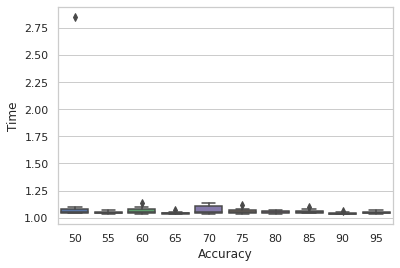

In [14]:
from mlxtend.frequent_patterns import apriori
import time 
apriori_time = []
for i in range(50, 100, 5):
    print(i)
    for j in range(0, 10):
      start = time.time()
      value = apriori(df, min_support=(i/100), use_colnames=True)
      print(len(value))
      end = time.time()
      exc_time = end - start
      apriori_time.append([str(i), exc_time, len(value), 'Apriori'])
Apriori_dataframe = pd.DataFrame(data=apriori_time, columns=['Accuracy', 'Time', 'Number_of_patterns', 'Algorithm'])
Apriori_dataframe.to_csv("/content/drive/MyDrive/CSE477 Project/Kosarak_Apriori.csv")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Accuracy", y="Time", data=Apriori_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Kosarak_Apriori.png")

50
1
1
1
1
1
1
1
1
1
1
55
0
0
0
0
0
0
0
0
0
0
60
0
0
0
0
0
0
0
0
0
0
65
0
0
0
0
0
0
0
0
0
0
70
0
0
0
0
0
0
0
0
0
0
75
0
0
0
0
0
0
0
0
0
0
80
0
0
0
0
0
0
0
0
0
0
85
0
0
0
0
0
0
0
0
0
0
90
0
0
0
0
0
0
0
0
0
0
95
0
0
0
0
0
0
0
0
0
0
   Accuracy      Time  Number_of_patterns  Algorithm
0        50  5.625405                   1  Fp-Growth
1        50  5.756809                   1  Fp-Growth
2        50  5.903941                   1  Fp-Growth
3        50  6.089185                   1  Fp-Growth
4        50  5.812860                   1  Fp-Growth
..      ...       ...                 ...        ...
95       95  4.936857                   0  Fp-Growth
96       95  5.236668                   0  Fp-Growth
97       95  5.073672                   0  Fp-Growth
98       95  5.162206                   0  Fp-Growth
99       95  5.137509                   0  Fp-Growth

[100 rows x 4 columns]


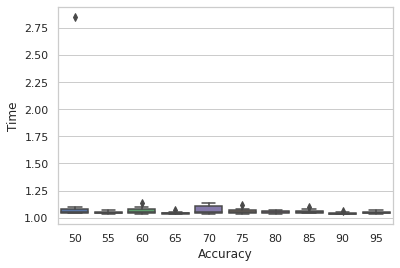

In [16]:
from mlxtend.frequent_patterns import fpgrowth
import time 
fp_time = []
for i in range(50, 100, 5):
    print(i)
    for j in range(0, 10):
      start = time.time()
      value = fpgrowth(df, min_support=(i/100), use_colnames=True)
      print(len(value))
      end = time.time()
      exc_time = end-start
      fp_time.append([str(i), exc_time, len(value), 'Fp-Growth'])
Fp_dataframe = pd.DataFrame(data=fp_time, columns=['Accuracy', 'Time', 'Number_of_patterns', 'Algorithm'])
Fp_dataframe.to_csv("/content/drive/MyDrive/CSE477 Project/Kosarak_Fp.csv")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Accuracy", y="Time", data=Apriori_dataframe)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Kosarak_Fp.png")
print(Fp_dataframe)

# This is used just for analysis purposes
counter = Counter([j for i in range(len(dataset)) for j in dataset[i]]) <br/>
counter.most_common()

# It is used to upgrade mlxtend
%pip install mlxtend --upgrade

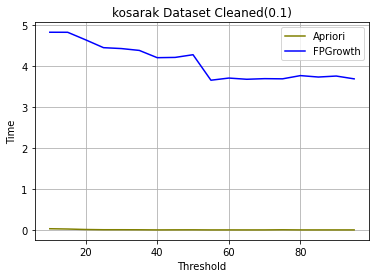

In [ ]:
import matplotlib.pyplot as plt
x, y1, y2 = [i for i in apriori_time.keys()], [i for i in apriori_time.values()], [i for i in fpgrowth_time.values()]
plt.plot(x, y1, label='Apriori', color = 'olive')
plt.plot(x, y2, label = 'FPGrowth', color= 'blue')
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Time")
plt.title("kosarak Dataset Cleaned(0.1)")
plt.legend()
plt.savefig('/content/drive/MyDrive/CSE477 Project/kosarakCleaned(0.1).png', dpi = 300)
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 14.2MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


   Accuracy      Time  Number_of_patterns  Algorithm
0        50  5.625405                   1  Fp-Growth
1        50  5.756809                   1  Fp-Growth
2        50  5.903941                   1  Fp-Growth
3        50  6.089185                   1  Fp-Growth
4        50  5.812860                   1  Fp-Growth
..      ...       ...                 ...        ...
95       95  4.936857                   0  Fp-Growth
96       95  5.236668                   0  Fp-Growth
97       95  5.073672                   0  Fp-Growth
98       95  5.162206                   0  Fp-Growth
99       95  5.137509                   0  Fp-Growth

[100 rows x 4 columns]


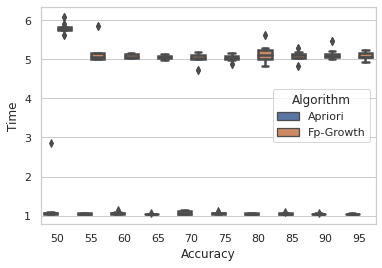

In [18]:
Apriori_dataframe = Apriori_dataframe.append(Fp_dataframe)
ax = sns.boxplot(x="Accuracy", y="Time", hue="Algorithm",
                 data=Apriori_dataframe, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/CSE477 Project/Kosarak_Comparison.png")
print(Fp_dataframe)

0     50
10    55
20    60
30    65
40    70
50    75
60    80
70    85
80    90
90    95
Name: Accuracy, dtype: object

0     2.854376
1     1.073216
2     1.038722
3     1.097802
4     1.040646
        ...   
95    4.936857
96    5.236668
97    5.073672
98    5.162206
99    5.137509
Name: Time, Length: 300, dtype: float64

No handles with labels found to put in legend.


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


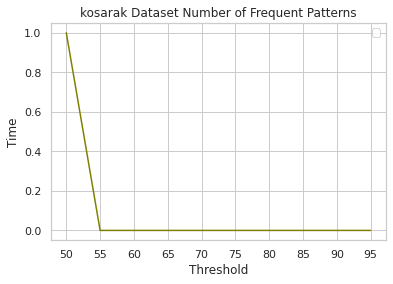

In [48]:
import matplotlib.pyplot as plt
x = list(Apriori_dataframe[['Accuracy', 'Number_of_patterns']].drop_duplicates()['Accuracy'])
y1 = list(Apriori_dataframe[['Accuracy', 'Number_of_patterns']].drop_duplicates()['Number_of_patterns'])
plt.plot(x, y1, color = 'olive')
# plt.plot(x, y2, label = 'FPGrowth', color= 'blue')

print(list(Apriori_dataframe[['Accuracy', 'Number_of_patterns']].drop_duplicates()['Number_of_patterns']))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Time")
plt.title("kosarak Dataset Number of Frequent Patterns")
plt.legend()
plt.savefig('/content/drive/MyDrive/CSE477 Project/kosarak Dataset Number of Frequent Patterns.png', dpi = 300)
plt.show()